In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv("Titanic.csv")

In [3]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,male,22.0,1,0,7.2500,S,Third,man,False,0
1,female,38.0,1,0,71.2833,C,First,woman,False,1
2,female,26.0,0,0,7.9250,S,Third,woman,True,1
3,female,35.0,1,0,53.1000,S,First,woman,False,1
4,male,35.0,0,0,8.0500,S,Third,man,True,0


In [4]:
df.isna().sum()

sex           0
age         177
sibsp         0
parch         0
fare          0
embarked      2
class         0
who           0
alone         0
survived      0
dtype: int64

In [5]:
df.fillna(df.mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_8772\820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [6]:
df.isna().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    2
class       0
who         0
alone       0
survived    0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isna().sum()

sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
class       0
who         0
alone       0
survived    0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
df.columns

Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who',
       'alone', 'survived'],
      dtype='object')

In [11]:
cols = ['sex', 'embarked', 'class', 'who', 'alone']

In [12]:
for i in cols:
    le = LabelEncoder()
    a = le.fit_transform(df[i])
    df[i] = a

In [13]:
df.head()

,sex,age,sibsp,parch,fare,embarked,class,who,alone,survived
0,1,22.0,1,0,7.2500,2,2,1,0,0
1,0,38.0,1,0,71.2833,0,0,2,0,1
2,0,26.0,0,0,7.9250,2,2,2,1,1
3,0,35.0,1,0,53.1000,2,0,2,0,1
4,1,35.0,0,0,8.0500,2,2,1,1,0


In [14]:
X = df.drop("survived", axis = 1)
y = df.survived

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = model.predict_proba(X_test)

In [20]:
y_pred

array([[0.55413764, 0.44586236],
       [0.90346337, 0.09653663],
       [0.70271971, 0.29728029],
       [0.71612627, 0.28387373],
       [0.06787979, 0.93212021],
       [0.30828769, 0.69171231],
       [0.67387012, 0.32612988],
       [0.85954973, 0.14045027],
       [0.13482489, 0.86517511],
       [0.93545568, 0.06454432],
       [0.88536336, 0.11463664],
       [0.29046478, 0.70953522],
       [0.73116666, 0.26883334],
       [0.81096138, 0.18903862],
       [0.10635385, 0.89364615],
       [0.75001218, 0.24998782],
       [0.94161519, 0.05838481],
       [0.86944202, 0.13055798],
       [0.88981953, 0.11018047],
       [0.34350536, 0.65649464],
       [0.18104889, 0.81895111],
       [0.08541542, 0.91458458],
       [0.43425973, 0.56574027],
       [0.62314741, 0.37685259],
       [0.41576221, 0.58423779],
       [0.10838139, 0.89161861],
       [0.0903686 , 0.9096314 ],
       [0.84935648, 0.15064352],
       [0.73481916, 0.26518084],
       [0.85885787, 0.14114213],
       [0.

In [21]:
from sklearn.metrics import roc_auc_score, roc_curve

In [22]:
fpr, tpr, th = roc_curve(y_test, y_pred[:,1], pos_label=1)

In [23]:
fpr

array([0.        , 0.        , 0.        , 0.00909091, 0.00909091,
       0.00909091, 0.00909091, 0.01818182, 0.01818182, 0.02727273,
       0.02727273, 0.04545455, 0.04545455, 0.05454545, 0.05454545,
       0.08181818, 0.08181818, 0.10909091, 0.10909091, 0.14545455,
       0.14545455, 0.15454545, 0.15454545, 0.17272727, 0.17272727,
       0.18181818, 0.18181818, 0.2       , 0.2       , 0.23636364,
       0.23636364, 0.27272727, 0.27272727, 0.3       , 0.31818182,
       0.31818182, 0.33636364, 0.34545455, 0.34545455, 0.37272727,
       0.37272727, 0.41818182, 0.41818182, 0.48181818, 0.48181818,
       0.5       , 0.59090909, 0.59090909, 0.66363636, 0.66363636,
       0.68181818, 0.72727273, 0.73636364, 0.73636364, 0.76363636,
       0.78181818, 0.80909091, 0.81818182, 0.81818182, 0.82727273,
       0.84545455, 0.88181818, 0.9       , 0.91818182, 0.91818182,
       1.        ])

In [24]:
tpr

array([0.        , 0.01470588, 0.29411765, 0.29411765, 0.36764706,
       0.39705882, 0.42647059, 0.42647059, 0.5       , 0.5       ,
       0.52941176, 0.52941176, 0.55882353, 0.55882353, 0.60294118,
       0.60294118, 0.61764706, 0.61764706, 0.67647059, 0.67647059,
       0.69117647, 0.69117647, 0.72058824, 0.72058824, 0.73529412,
       0.73529412, 0.77941176, 0.77941176, 0.79411765, 0.79411765,
       0.80882353, 0.80882353, 0.82352941, 0.82352941, 0.82352941,
       0.83823529, 0.83823529, 0.83823529, 0.85294118, 0.85294118,
       0.86764706, 0.86764706, 0.88235294, 0.88235294, 0.89705882,
       0.89705882, 0.89705882, 0.91176471, 0.91176471, 0.92647059,
       0.92647059, 0.92647059, 0.94117647, 0.95588235, 0.95588235,
       0.95588235, 0.95588235, 0.95588235, 0.97058824, 0.97058824,
       0.98529412, 0.98529412, 0.98529412, 0.98529412, 1.        ,
       1.        ])

In [25]:
th

array([1.97007576, 0.97007576, 0.87546418, 0.86666778, 0.82355926,
       0.81895111, 0.78838743, 0.78392885, 0.70953522, 0.70893515,
       0.70383858, 0.69171231, 0.65827223, 0.65815455, 0.6328774 ,
       0.61507221, 0.59185362, 0.58270197, 0.56195433, 0.45634391,
       0.44586236, 0.43420623, 0.42541646, 0.40000854, 0.38965335,
       0.37685259, 0.34124274, 0.33589994, 0.33022659, 0.31099479,
       0.30678806, 0.28387373, 0.28349079, 0.26883334, 0.26518084,
       0.26162473, 0.24998782, 0.23538641, 0.23411472, 0.19963748,
       0.19703392, 0.17849095, 0.17404365, 0.14127602, 0.14114213,
       0.14049181, 0.13115391, 0.13113496, 0.12318786, 0.11840717,
       0.11553815, 0.11013742, 0.10930107, 0.1062762 , 0.09672724,
       0.09657493, 0.09653663, 0.09209289, 0.0900242 , 0.08988969,
       0.08885878, 0.0801355 , 0.07969554, 0.07216341, 0.06876757,
       0.035695  ])

In [26]:
random_proba = [0 for i in range(len(y_test))]

In [27]:
random_proba

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [28]:
p_fpr, p_tpr, p_th = roc_curve(y_test, random_proba, pos_label=1)

In [29]:
print("FPR", p_fpr)
print("TPR", p_tpr)
print("Threshold", p_th)

FPR [0. 1.]
TPR [0. 1.]
Threshold [1 0]


In [30]:
auc_score = roc_auc_score(y_test, y_pred[:,1])

In [31]:
auc_score

0.8512700534759359

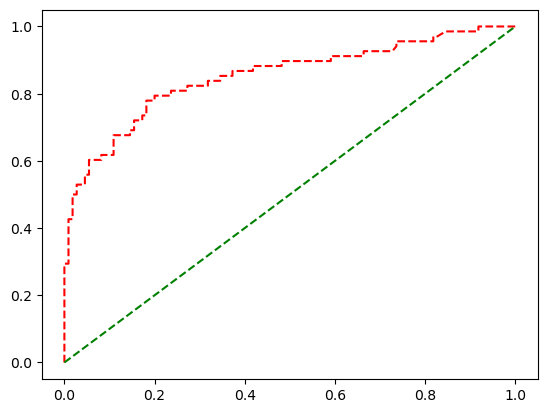

In [32]:
plt.plot(fpr, tpr, "r--")
plt.plot(p_fpr, p_tpr, "g--")
plt.show()